# Imports

In [1]:
import datetime
print(datetime.datetime.now())

import pandas
import numpy
import scipy
import itertools
import matplotlib
import matplotlib.pyplot as plt
from tqdm.auto import tqdm  # Progress bars
import gc  # garbage collection
import re  # regex for parsing some of the tagged data

print(2, datetime.datetime.now())

# To compare distances between dots
# from python_tsp.distances import euclidean_distance_matrix
# from python_tsp.exact import solve_tsp_dynamic_programming
# from python_tsp.exact import solve_tsp_brute_force
# from python_tsp.exact.branch_and_bound import solve_tsp_branch_and_bound

print(3, datetime.datetime.now())

import os
os.chdir(r'G:/My Drive/Colab Notebooks/CFL Analytics Project/')
import PIL
from math_functions import *
import axes_functions

print(4, datetime.datetime.now())

# Graphing imports
from axes_functions import WatermarkFigure
from axes_functions import McGill_figure
matplotlib.axes.Axes.plot_svg = axes_functions.plot_svg
matplotlib.axes.Axes.plot_png = axes_functions.plot_png
matplotlib.axes.Axes.plot_image = axes_functions.plot_image
matplotlib.axes.Axes.image_scatter = axes_functions.image_scatter
matplotlib.axes.Axes.trend_line = axes_functions.trend_line
matplotlib.axes.Axes.ROC_graph = axes_functions.ROC_graph
matplotlib.axes.Axes.precision_recall_graph = axes_functions.precision_recall_graph
matplotlib.axes.Axes.detection_error_graph = axes_functions.detection_error_graph
matplotlib.axes.Axes.continuous_errorbar = axes_functions.continuous_errorbar
matplotlib.axes.Axes.binomial_errorbar = axes_functions.binomial_errorbar

import nfl_data_py  # To get team colours and logos


print("Imports complete", datetime.datetime.now())


2025-01-06 15:39:37.993853
2 2025-01-06 15:39:41.690397
3 2025-01-06 15:39:41.690397
4 2025-01-06 15:39:45.256629
Imports complete 2025-01-06 15:39:45.315692


## rcParams

In [2]:

'''Fixing some of the default settings for matplotlib'''

plt.rcParams['figure.constrained_layout.use'] = True  # Makes all figures use constrained layout
plt.rcParams['axes.grid'] = True  # Turns on the grid by default for every graph
plt.rcParams['figure.facecolor'] = (0.95, 0.95, 0.95)

plt.rcParams['savefig.facecolor'] = (0.95, 0.95, 0.95)

plt.rcParams['axes.facecolor'] = (0.975, 0.975, 0.975)

plt.rcParams['figure.subplot.left'] = 0  # the left side of the subplots of the figure
plt.rcParams['figure.subplot.right'] = 1  # the right side of the subplots of the figure
plt.rcParams['figure.subplot.bottom'] = 0  # the bottom of the subplots of the figure
plt.rcParams['figure.subplot.top'] = 1  # the top of the subplots of the figure
plt.rcParams['figure.subplot.wspace'] = 0  # the amount of width reserved for space between subplots, expressed as a fraction of the average axis width
plt.rcParams['figure.subplot.hspace'] = 0  # the amount of height reserved for space between subplots, expressed as a fraction of the average axis height
plt.rcParams['xtick.major.size'] = 0  # major tick size in points
plt.rcParams['xtick.minor.size']  = 0  # minor tick size in points
plt.rcParams['ytick.major.size'] = 0  # major tick size in points
plt.rcParams['ytick.minor.size']  = 0  # minor tick size in points
plt.rcParams['lines.markeredgecolor'] = 'none'  # Makes it so we can use alpha plots and the surrounding circles don't show up

plt.rcParams['font.family'] = 'Arial'



# Data Import

In [3]:
"""Import the various data frames"""

path = "C:\\Users\\clementchristopher\\Downloads\\nfl-big-data-bowl-2025\\"    


def import_games():
    games = pandas.read_csv(path+"games.csv", header=0,
                            dtype={'gameId': numpy.float64,
                                   'season': numpy.float64,
                                   'week': numpy.float64,
                                    # 'gameTimeEastern': pandas.timedelta,
                                   'homeFinalScore': numpy.float64,
                                   'visitorFinalScore': numpy.float64},
                            parse_dates=['gameDate'])
    return games


def import_plays():
    plays = pandas.read_csv(path+"plays.csv", header=0,
                            dtype={'gameId': 'Int64',
                                   'playId': 'Int64',
                                   'ballCarrierId': 'Int64',
                                   'quarter': 'Int64',
                                   'down': 'Int64',
                                   'yardsToGo': 'Int64',
                                   'yardlineNumber': numpy.float64,
                                   # 'gameClock': ,
                                   'preSnapHomeScore': 'Int64',
                                   'preSnapVisitorScore': 'Int64',
                                   'passLength': numpy.float64,
                                   'penaltyYards': numpy.float64,
                                   'absoluteYardlineNumber': numpy.float64,
                                   'defendersInTheBox': numpy.float64,
                                   'passProbability': numpy.float64,
                                   'preSnapHomeTeamWinProbability': numpy.float64,
                                   'preSnapVisitorTeamWinProbability': numpy.float64,
                                   'homeTeamWinProbabilityAdded': numpy.float64,
                                   'visitorTeamWinProbilityAdded': numpy.float64,
                                   'expectedPoints': numpy.float64,
                                   'expectedPointsAdded': numpy.float64,
                                   'foulNFLId1': numpy.float64,
                                   'foulNFLId2': numpy.float64,})
    return plays


def import_players():
    players = pandas.read_csv(path+"players.csv", header=0,
                              dtype={'nflId': numpy.float64,
                                     #'height': numpy.float64,  # Need to convert this to a useful measure if I want to use it. Format is 5-8, 5-10, 6-1
                                     'weight': numpy.float64},
                              parse_dates=['birthDate'])
    return players


def import_player_play():
    player_play = pandas.read_csv(path+"player_play.csv", header=0,
                                  dtype={"gameId": numpy.float64,  # assign proper dtypes to everything
                                         "playId": numpy.float64,
                                         "nflId": numpy.float64,
                                         "hadRushAttempt": bool,
                                         "rushingYards": numpy.float64,
                                         "hadDropback": bool,
                                         "passingYards": numpy.float64,
                                         "hadPassReception": bool,
                                         "receivingYards": numpy.float64,
                                         "wasTargettedReceiver": numpy.float64,
                                         "yardageGainedAfterTheCatch": numpy.float64,
                                         "fumbles": numpy.float64,
                                         "fumbleLost": bool,
                                         "fumbleOutOfBounds": bool,
                                         "assistedTackle": bool,
                                         'forcedFumbleAsDefense': bool,
                                         'halfSackYardsAsDefense': numpy.float64,
                                         'passDefensed': bool,
                                         'quarterbackHit': bool,
                                         'sackYardsAsDefense': numpy.float64,
                                         'safetyAsDefense': bool,
                                         'soloTackle': bool,
                                         'tackleAssist': bool,
                                         'tackleForALoss': bool,
                                         'tackleForALossYardage': numpy.float64,
                                         'hadInterception': bool,
                                         'interceptionYards': numpy.float64,
                                         'fumbleRecoveries': numpy.float64,
                                         'fumbleRecoveryYards': numpy.float64,
                                         'penaltyYards': numpy.float64,
                                         # 'penaltyNames',
                                        #  'wasInitialPassRusher': bool,
                                         'causedPressure': bool,
                                         'timeToPressureAsPassRusher': numpy.float64,
                                         'getOffTimeAsPassRusher': numpy.float64,
                                        #  'inMotionAtBallSnap': bool,
                                        #  'shiftSinceLineset': bool,
                                        #  'motionSinceLineset': bool,
                                        #  'wasRunningRoute': bool,
                                        #  'routeRan',
                                         'blockedPlayerNFLId1': numpy.float64,
                                         'blockedPlayerNFLId2': numpy.float64,
                                         'blockedPlayerNFLId3': numpy.float64,
                                        #  'pressureAllowedAsBlocker': bool,
                                         'timeToPressureAllowedAsBlocker': numpy.float64,
                                         #  'pff_defensiveCoverageAssignment',
                                         'pff_primaryDefensiveCoverageMatchupNflId': numpy.float64,
                                         'pff_secondaryDefensiveCoverageMatchupNflId': numpy.float64
                                         })
    return player_play


def import_tracking():
    tracking_sheets = []
    for week in tqdm(range(1, 10), desc="Importing tracking data"):
        tracking_sheets.append(pandas.read_csv(path+"tracking_week_"+week.__str__()+".csv",
                                               header=0,
                                               dtype={'gameId': 'Int64', 'playId': 'Int64'}))
        # Remove plays that are not in the tagged dataset to save memory
        tracking_sheets[-1]['Id'] = tracking_sheets[-1]['gameId'].astype(str) + tracking_sheets[-1]['playId'].astype('str')
        tracking_sheets[-1]['Id'] = tracking_sheets[-1]['Id'].astype('Int64')
        tracking_sheets[-1] = tracking_sheets[-1][tracking_sheets[-1]['Id'].isin(plays_df['Id'])]
        tracking_sheets[-1] = tracking_sheets[-1][tracking_sheets[-1]['event'] == 'ball_snap']
    tracking = pandas.concat(tracking_sheets)
    del tracking_sheets  # Remove the individual sheets to save memory before converting dtypes
    tracking = tracking.astype({'gameId': 'Int64',
                                'playId': 'Int64',
                                'nflId': 'Int64',
                                'frameId': 'Int64',
                                'jerseyNumber': 'Int64',
                                'x': numpy.float64,
                                'y': numpy.float64,
                                's': numpy.float64,
                                'a': numpy.float64,
                                'dis': numpy.float64,
                                'o': numpy.float64,
                                'dir': numpy.float64})
    
    tracking['club_and_jersey'] = tracking['club'] + " " + tracking['jerseyNumber'].astype('str').str.zfill(2)  # Useful for matching on other datasets
    return tracking


def import_PFF_advantage():
    # TODO: Include the correct dtypes
    PFF_df = pandas.read_excel("C:\\Users\\clementchristopher\\OneDrive\\nfl-big-data-bowl-2025\\PFF Data.xlsx",
                               sheet_name="PFF data",
                               header=0,
                                dtype = {"pff_PLAYID": 'Int64', "pff_GAMEID": 'Int64', "pff_GAMESEASON": 'Int64', "pff_GSISGAMEKEY": 'Int64', "pff_GSISPLAYID": 'Int64', "pff_QUARTER": 'Int64',
            "pff_DOWN": 'Int64', "pff_BLITZDOG": 'Int64', 'pff_CATCHABLE': 'Int64', 'pff_DEEPPASS': 'Int64', 'pff_DEFSCORE': 'Int64', 'pff_DRAW': 'Int64', 'pff_DRIVE': 'Int64',
            'pff_DRIVEPLAY': 'Int64', 'pff_GAINLOSS': 'Int64', 'pff_FIRST_DOWN_GAINED': 'Int64', 'pff_GARBAGETIME': 'Int64', 'pff_GETOFFTIME': numpy.float64, 'pff_KICKYARDS': 'Int64',
            'pff_NOHUDDLE': 'Int64', 'pff_NOPLAY': 'Int64', 'pff_OFFFORMATIONUNBALANCED': 'Int64', 'pff_OFFSCORE': 'Int64', 'pff_OPTION': 'Int64', 'pff_PENALTYYARDS': 'Int64',
            'pff_PLAYACTION': 'Int64', 'pff_PREVIOUSPFFPLAYID': 'Int64', 'pff_NEXTPFFPLAYID': 'Int64', 'pff_RETURNYARDS': 'Int64', 'pff_SCORE': str, 'pff_SCREEN': 'Int64', 'pff_SNAPTIME': numpy.float64,
            'pff_SORTORDER': 'Int64', 'pff_STUNT': 'Int64', 'pff_TIMETOPRESSURE': numpy.float64, 'pff_TIMETOTHROW': numpy.float64, 'pff_TRICKLOOK': 'Int64', 'pff_TRICKPLAY': 'Int64',
            'pff_YARDSAFTERCATCH': 'Int64', 'pff_YARDSAFTERCONTACT': 'Int64', 'pff_3MINUTE': 'Int64', 'pff_DISTANCE': 'Int64', 'pff_DRIVEENDFIELDPOSITION': 'Int64', 'pff_DRIVEENDPLAYNUMBER': 'Int64',
            'pff_DRIVESTARTFIELDPOSITION': 'Int64', 'pff_DROPBACKDEPTH': 'Int64', 'pff_FIELDPOSITION': 'Int64', 'pff_GAINLOSSNET': 'Int64', 'pff_HANGTIME': numpy.float64, 'pff_KICKDEPTH': 'Int64',
            'pff_KICKWIDTH': 'Int64', 'pff_OPERATIONTIME': 'Int64', 'pff_PASSDEPTH': 'Int64', "pff_PASSWIDTH": 'Int64', 'pff_PLAYENDFIELDPOSITION': "Int64", 'pff_PUMPFAKE': 'Int64', 'pff_QBMOVEDOFFSPOT': 'Int64',
            'pff_QBRESET': 'Int64', 'pff_SCOREDIFFERENTIAL': 'Int64', 'pff_RUNPASSOPTION': 'Int64', 'pff_PLAYCLOCK': 'Int64'})
    advantage_data = pandas.read_excel("C:\\Users\\clementchristopher\\OneDrive\\nfl-big-data-bowl-2025\\PFF Data - Advantage.xlsx", sheet_name="PFF data", header=0,
                                       dtype={"pff_PLAYID": 'Int64',
                                              "pff_GAMEID": 'Int64',
                                              "pff_WEEK": 'Int64',
                                              "pff_GSISGAMEKEY": 'Int64',
                                              "pff_GSISPLAYID": 'Int64',
                                              "pff_QUARTER": 'Int64',
                                              "pff_SORTORDER": 'Int64',
                                              "pff_GAINLOSSNET": 'Int64'})
    final_df = pandas.merge(left=PFF_df,
                            right=advantage_data[["pff_PLAYID", "pff_GAMEID", "pff_GAMEDATE", "pff_WEEK", "pff_GSISGAMEKEY", "pff_GSISPLAYID", "ADVANTAGE"]],
                            left_on=["pff_PLAYID", "pff_GAMEID", "pff_GAMEDATE", "pff_WEEK", "pff_GSISGAMEKEY", "pff_GSISPLAYID"],
                            right_on=["pff_PLAYID", "pff_GAMEID", "pff_GAMEDATE", "pff_WEEK", "pff_GSISGAMEKEY", "pff_GSISPLAYID"])

    final_df = final_df[final_df["ADVANTAGE"].isin([False, True])]
    final_df = final_df.replace("ARZ", "ARI", regex=True)
    final_df = final_df.replace("BLT", "BAL", regex=True)
    final_df = final_df.replace("CLV", "CLE", regex=True)
    final_df = final_df.replace("HST", "HOU", regex=True)
    return final_df


games_df = import_games()
plays_df = import_plays()
# players_df = import_players()
# player_play_df = import_player_play()
teams_df = nfl_data_py.import_team_desc()  # For team colours and logos
teams_df = teams_df[teams_df['team_abbr'].isin(plays_df['possessionTeam'])]

advantage_df = import_PFF_advantage()
# Add the "gameId" column to advantage by matching from games_df
advantage_df["gameId"] = [int(games_df[(games_df["gameDate"] == row["pff_GAMEDATE"]) &  # game date must match
                                   (((games_df["homeTeamAbbr"] == row["pff_OFFTEAM"]) & (games_df["visitorTeamAbbr"] == row["pff_DEFTEAM"])) |  # either O is home and D is away
                                    ((games_df["homeTeamAbbr"] == row["pff_DEFTEAM"]) & (games_df["visitorTeamAbbr"] == row["pff_OFFTEAM"])))]["gameId"].values[0]) for r, row in advantage_df.iterrows()]  # Or D is home and O is away
# Since the same two teams can't play twice on the same day this will give us a unique match

# merge plays and advantage data, remove plays that don't appear in both
plays_df = pandas.merge(left=plays_df,
                        right=advantage_df,
                        left_on=['gameId', 'playId'],
                        right_on=['gameId', 'pff_GSISPLAYID'],
                        how='inner')

plays_df = plays_df.loc[:,~plays_df.apply(lambda x: x.duplicated(),axis=1).all()].copy()  # Remove duplicate columns by values
# Give a single play key column because it's a pain to pass everything around as multiple keys 
plays_df['Id'] = plays_df['gameId'].astype(str) + plays_df['playId'].astype('str')
plays_df['Id'] = plays_df['Id'].astype('Int64')
plays_df = plays_df.set_index('Id', drop=False)  # TODO: One day move this all to multikey with game, play, nflId, frame
plays_df.index.names = ['index']

tracking_df = import_tracking()

complete_games = plays_df.groupby('gameId').size()
complete_games = complete_games[complete_games > 80]
plays_df = plays_df[plays_df['gameId'].isin(complete_games.keys())]
games_df = games_df[games_df['gameId'].isin(complete_games.keys())]
tracking_df = tracking_df[tracking_df['Id'].isin(plays_df['Id'])]
plays_df = plays_df[plays_df['Id'].isin(tracking_df['Id'])]

Importing tracking data:   0%|          | 0/9 [00:00<?, ?it/s]

In [10]:
print(plays_df.__len__())

6873


# Data Cleaning

In [5]:
import traceback

def remove_plays_without_22(plays_df):
    # remove plays without 22 players
    counts = tracking_df[tracking_df['event'] == 'ball_snap'].groupby("Id").size()
    counts = counts[counts == 23]
    plays_df = plays_df[plays_df['Id'].isin(counts.keys())]
    return(plays_df)


def remove_incomplete_games(plays_df):
    # Remove games with < 150 tagged plays
    complete_games = plays_df.groupby("gameId").size()
    complete_games = complete_games[complete_games > 80]
    plays_df = plays_df[plays_df['gameId'].isin(complete_games.keys())]
    print(plays_df.__len__())


def tracking_cleanup(df, plays):
    # Adds certain columns to tracking_df
    df = df.merge(plays[['Id', 'absoluteYardlineNumber', 'possessionTeam']], how='inner', on='Id')
    df['AdjustedX'] = df['x'] - df['absoluteYardlineNumber']
    df['OD'] = df['club'] == df['possessionTeam']

    df['AdjustedX'] = df['AdjustedX'].where(df['playDirection'] == 'right', df['AdjustedX'] * (-1)).round(3)
    df["AdjustedO"] = numpy.deg2rad(df["o"]).where(df["playDirection"] == "right", numpy.deg2rad(df["o"] * -1) + 2 * numpy.pi)
    df["AdjustedDir"] = numpy.deg2rad(df["dir"]).where(df["playDirection"] == "right", numpy.deg2rad(df["dir"] * -1) + 2 * numpy.pi)

    df = df.drop(['absoluteYardlineNumber', 'possessionTeam'], axis=1)
    return df


def add_play_direction(plays_df):
    play_direction = tracking_df.groupby('Id')['playDirection'].unique()
    plays_df['playDirection'] = [play_direction.loc[x][0] for x in plays_df['Id'].tolist()]
    return plays_df


def identify_motion(tracking_df, plays_df):
    # This officially counts as "using the dots"
    # Find max offensive player speed at snap
    motion_plays = tracking_df[(tracking_df['event'] == "ball_snap") & tracking_df["OD"]].groupby('Id')["s"].max() > 2  # 0.5s gets us closest to the pff definition of motion, 3908 our way vs 3893 their way, but that includes *shifts*
    motion_plays = motion_plays[motion_plays]  # Get only the "True" rows, where max O player speed is greater than the threshold
    plays_df['motion'] = plays_df['Id'].isin(motion_plays.keys())
    return plays_df


def identify_presnap_zone(row):
    try:
        if row['OD']:  # For Offensive players
            if row['club_and_jersey'] not in plays_df.loc[row['Id']]['pff_OFFPERSONNELSKILL']:
                return "box"
            else:
                # match = re.findall(row['club'] + " " + row['jerseyNumber'].__str__().zfill(2) + " \(([A-Z-]+)\)", plays_df[plays_df["Id"] == row['Id']]['pff_OFFPLAYERS'].values[0], flags=re.IGNORECASE)
                match = re.findall(row['club_and_jersey'] + " \(([A-Z-]+)\)", plays_df.loc[row['Id']]['pff_OFFPLAYERS'], flags=re.IGNORECASE)
                if match[0] in ["LT", "LG", "C", "RG", "RT",\
                                "TE-R", "TE-oR", "TE-iR", "TE-L", "TE-oL", "TE-iL",\
                                "QB", "HB", "HB-R", "HB-L", "FB", "FB-L", "FB-R", "MFB", "FB-oR", "FB-iR"]:
                    return "box"
                elif match[0] in ["LWR", "SLiWR", "SLWR", "SLoWR"]:
                    return "left"
                elif match[0] in ["RWR", "SRWR", "SRoWR", "SRiWR"]:
                    return "right"
                elif row['nflId'] == 44831:  # There's a weird glitch with OJ Howard's jersey number
                    return "box"
                else:
                    print(match)
        elif not row['OD']:
            if row['club_and_jersey'] in plays_df.loc[row['Id']]['pff_BOXPLAYERS']:
                return "box"
            elif row['y'] < 53.33333 / 2:
                return "left"
            elif row['y'] > 53.33333 / 2:
                return "right"
            else:
                print(row)
    except Exception as err:
        print(err)
        # traceback.print_exc()
        print(row)
        print(plays_df.loc[row['Id']]['pff_OFFPLAYERS'])
        print(plays_df.loc[row['Id']]['pff_BOXPLAYERS'])


def identify_attack_zone(plays_df):
    # given a play, how do we figure out the attack zone?
    
    plays_df['attack_zone'] = ""

    plays_df['attack_zone'].loc[(plays_df['attack_zone'] == "") & (plays_df['playDirection'] == 'left') & (~pandas.isnull(plays_df['targetY'])) & (plays_df['targetY'] < 20)] = "left"
    plays_df['attack_zone'].loc[(plays_df['attack_zone'] == "") & (plays_df['playDirection'] == 'left') & (~pandas.isnull(plays_df['targetY'])) & (plays_df['targetY'] > 33.333)] = "right"

    plays_df['attack_zone'].loc[(plays_df['attack_zone'] == "") & (plays_df['playDirection'] == 'right') & (~pandas.isnull(plays_df['targetY'])) & (plays_df['targetY'] < 20)] = "right"
    plays_df['attack_zone'].loc[(plays_df['attack_zone'] == "") & (plays_df['playDirection'] == 'right') & (~pandas.isnull(plays_df['targetY'])) & (plays_df['targetY'] > 33.333)] = "left"

    # Passes more than 5 yards deep over the middle split arbitrarily down the middle

    plays_df['attack_zone'].loc[(plays_df['attack_zone'] == "") & (plays_df['playDirection'] == 'left') & (~pandas.isnull(plays_df['targetY'])) & (plays_df['targetY'] < 53.333/2) & (plays_df['pff_PASSDEPTH'] > 5)] = "left"
    plays_df['attack_zone'].loc[(plays_df['attack_zone'] == "") & (plays_df['playDirection'] == 'left') & (~pandas.isnull(plays_df['targetY'])) & (plays_df['targetY'] > 53.333/2) & (plays_df['pff_PASSDEPTH'] > 5)] = "right"

    plays_df['attack_zone'].loc[(plays_df['attack_zone'] == "") & (plays_df['playDirection'] == 'right') & (~pandas.isnull(plays_df['targetY'])) & (plays_df['targetY'] < 53.333/2) & (plays_df['pff_PASSDEPTH'] > 5)] = "right"
    plays_df['attack_zone'].loc[(plays_df['attack_zone'] == "") & (plays_df['playDirection'] == 'right') & (~pandas.isnull(plays_df['targetY'])) & (plays_df['targetY'] > 53.333/2) & (plays_df['pff_PASSDEPTH'] > 5)] = "left"

    # Passes right over the middle
    plays_df['attack_zone'].loc[(plays_df['attack_zone'] == "") & (~pandas.isnull(plays_df['pff_PASSDEPTH'])) & (plays_df['pff_PASSDEPTH'] < 5)] = "box"

    # Scrambles and handoffs

    plays_df['attack_zone'].loc[((plays_df['attack_zone'] == "") & ~pandas.isnull(plays_df['pff_QBSCRAMBLE']))] = "box"
    plays_df['attack_zone'].loc[(plays_df['attack_zone'] == "") & (plays_df['pff_RUNPASS'] == "R")] = "box"
    
    # Sacks?

    # pass width can also be used, it can be tuned a bit, whereas passdirection is just whether the pass is beyond the numbers
    # rush - how to handle QB rush

    return plays_df


def attacked_presnap_advantage(row):
    if not row['attack_zone']:
        return ''
    # print(row)
    try:
        O_val = zone_counts[(zone_counts['Id'] == row['Id']) & (zone_counts['presnap_zone'] == row['attack_zone']) & (zone_counts['OD'] == True)]['size'].values[0]
    except Exception as err:
        O_val = 0
    try:
        D_val = zone_counts[(zone_counts['Id'] == row['Id']) & (zone_counts['presnap_zone'] == row['attack_zone']) & (zone_counts['OD'] == False)]['size'].values[0]
    except Exception as err:
        D_val = 0
    relative_count =  O_val - D_val

    if row['attack_zone'] == "box":
        if relative_count >=2:
            return True
        elif relative_count == 1 and row['pff_BALLCARRIER'] == row['pff_QB']:
            return True
        else:
            return False
    elif row['attack_zone'] in ["left", 'right']:
        if "12" in row['pff_PASSROUTETARGETGROUP'] or (row['pff_PASSROUTETARGETGROUP'].__len__() == 2 and row['pff_PASSROUTETARGETGROUP'][0] == 1):
            if relative_count >= 1:
                return True
            else:
                return False
        else:
            if relative_count >= 0:
                return True
            else:
                return False



# remove_plays_without_22(plays_df)
# remove_incomplete_games(plays_df)        

tracking_df['presnap_zone'] = ''
tracking_df = tracking_cleanup(tracking_df, plays_df)
plays_df = identify_motion(tracking_df, plays_df)
tracking_df['presnap_zone'].loc[(tracking_df['event'] == 'ball_snap') & (tracking_df['club'] != "football")] = [identify_presnap_zone(row) for r, row in tqdm(tracking_df[(tracking_df['event'] == 'ball_snap') & (tracking_df['club'] != "football")].iterrows(), total=tracking_df[(tracking_df['event'] == 'ball_snap') & (tracking_df['club'] != "football")].__len__(), desc='identifying presnap zone')]
plays_df = add_play_direction(plays_df)
plays_df = identify_attack_zone(plays_df)

plays_df['pff_PASSROUTETARGETGROUP'] = plays_df['pff_PASSROUTETARGETGROUP'].astype('str')  # TODO: Move this to the data imports
zone_counts = tracking_df[(tracking_df['event'] == 'ball_snap') & (tracking_df['club'] != 'football')].groupby(['Id', 'presnap_zone', 'OD'], as_index=False).size()
plays_df['attack_presnap_advantage'] = ''
plays_df['attack_presnap_advantage'] = [attacked_presnap_advantage(row) for r, row in tqdm(plays_df.iterrows(), total=plays_df.__len__(), desc="Identifying attacked presnap advantage")]


identifying presnap zone:   0%|          | 0/151206 [00:00<?, ?it/s]

C:\Users\clementchristopher\AppData\Local\Temp\ipykernel_338172\681938631.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracking_df['presnap_zone'].loc[(tracking_df['event'] == 'ball_snap') & (tracking_df['club'] != "football")] = [identify_presnap_zone(row) for r, row in tqdm(tracking_df[(tracking_df['event'] == 'ball_snap') & (tracking_df['club'] != "football")].iterrows(), total=tracking_df[(tracking_df['event'] == 'ball_snap') & (tracking_df['club'] != "football")].__len__(), desc='identifying presnap zone')]
C:\Users\clementchristopher\AppData\Local\Temp\ipykernel_338172\681938631.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

Identifying attacked presnap advantage:   0%|          | 0/6873 [00:00<?, ?it/s]

# Graphs

Plotting images:   0%|          | 0/32 [00:00<?, ?it/s]

{'_im': None, '_mode': 'P', '_size': (100, 100), 'palette': <PIL.ImagePalette.ImagePalette object at 0x000001EAA9AD1AB0>, 'info': {'gamma': 0.45455, 'chromaticity': (0.3127, 0.329, 0.64, 0.33, 0.3, 0.6, 0.15, 0.06)}, 'readonly': 1, '_exif': None, '_min_frame': 0, 'custom_mimetype': None, 'tile': [_Tile(codec_name='zip', extents=(0, 0, 100, 100), offset=790, args='P')], 'decoderconfig': (), 'decodermaxblock': 65536, 'fp': <_io.BytesIO object at 0x000001EAA2747970>, 'filename': '', '_exclusive_fp': True, '_fp': <_io.BytesIO object at 0x000001EAA2747970>, '_PngImageFile__frame': 0, 'private_chunks': [], 'png': <PIL.PngImagePlugin.PngStream object at 0x000001EAA9AD28F0>, '_text': None, 'n_frames': 1, 'default_image': False, '_PngImageFile__prepare_idat': 1330, 'is_animated': False}
ADVANTAGE  passResult
0.0        C             0.514495
           I             0.353761
           IN            0.028257
           R             0.022385
           S             0.081101
1.0        C       

Plotting images:   0%|          | 0/32 [00:00<?, ?it/s]

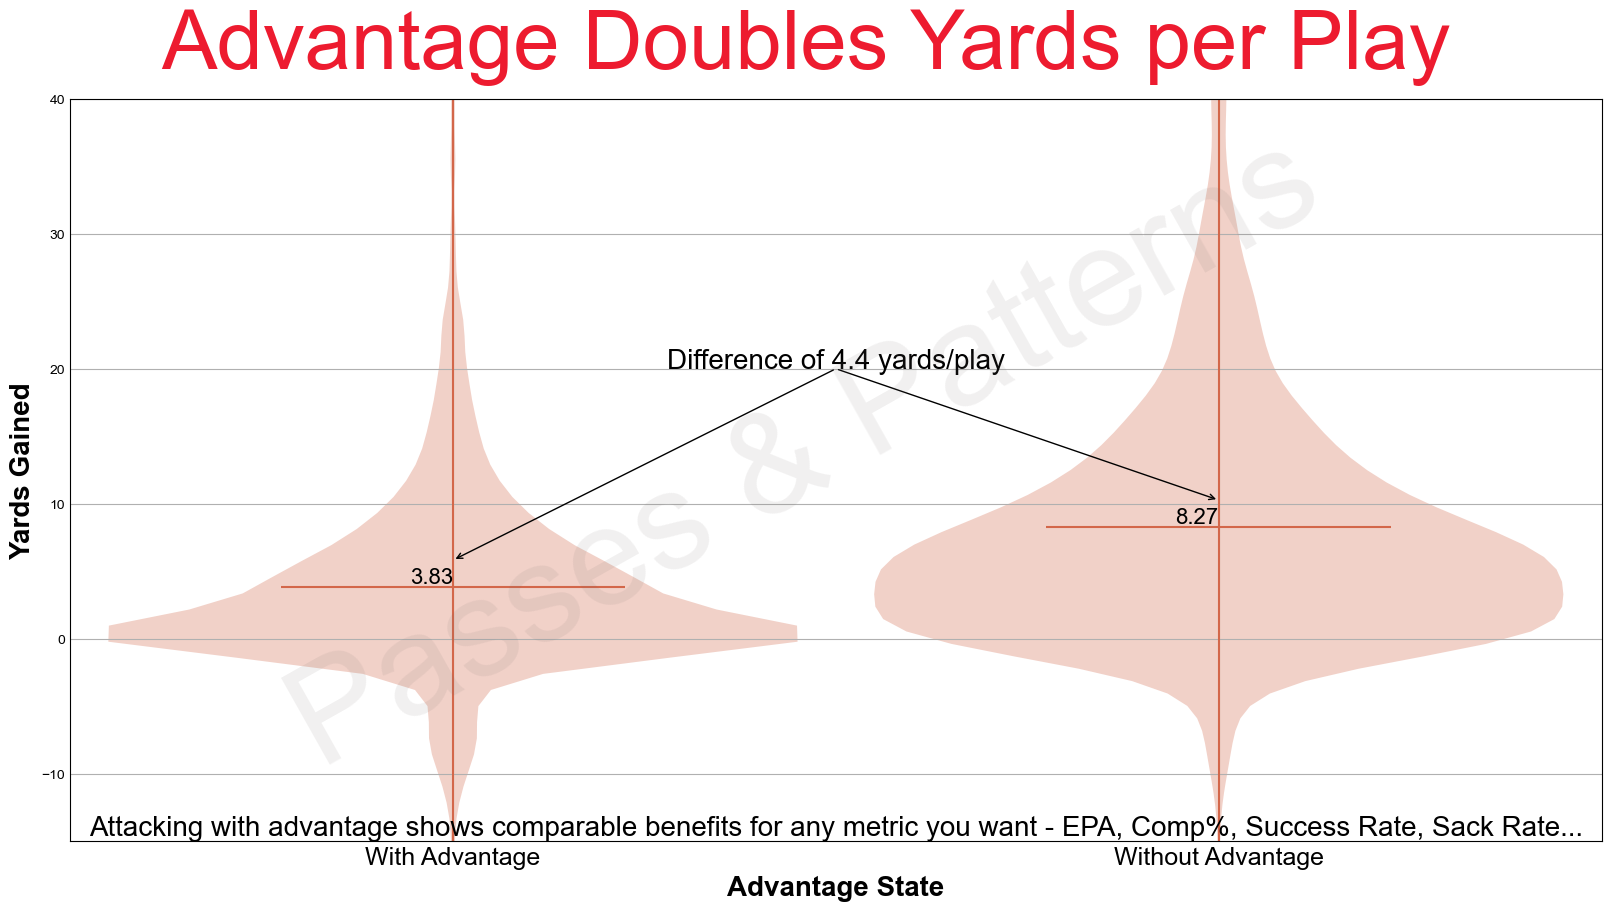

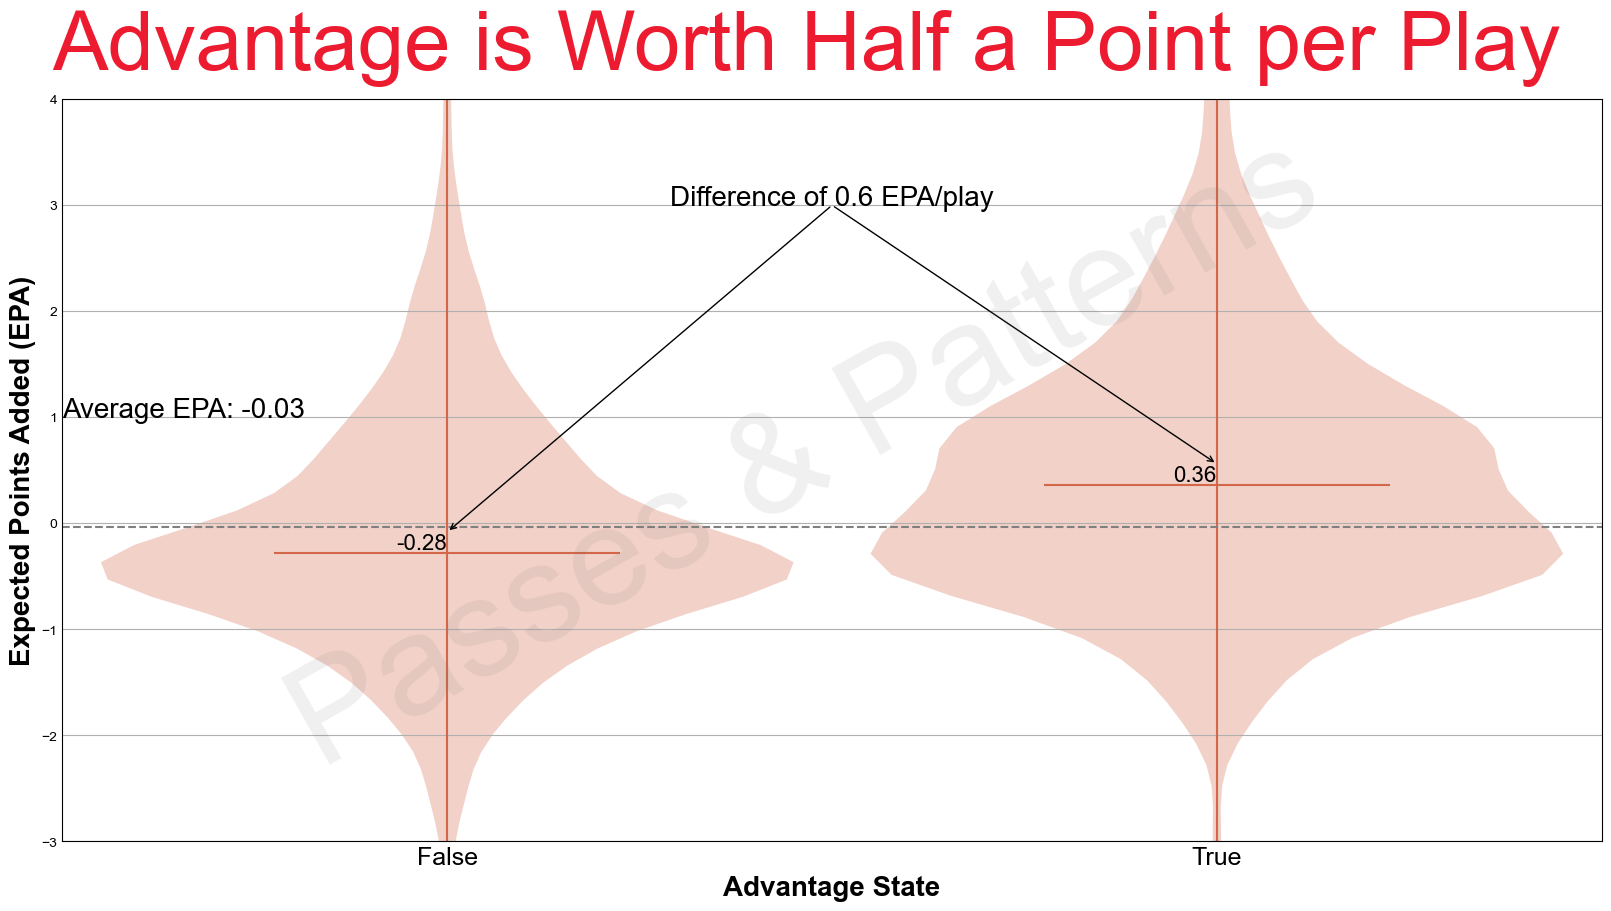

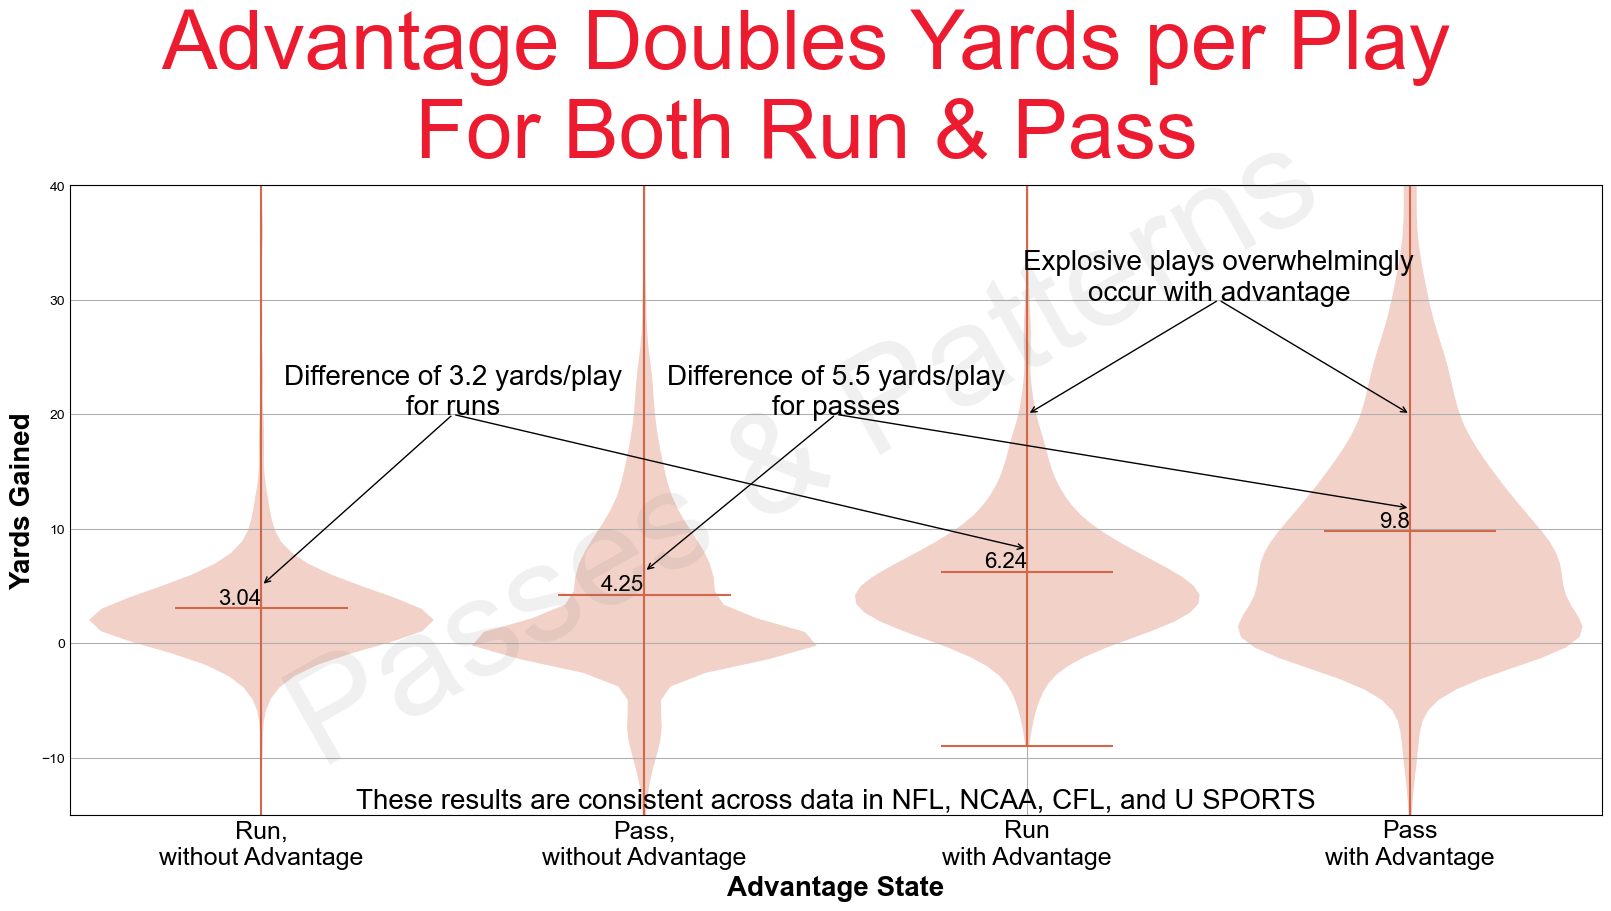

c:\Users\clementchristopher\AppData\Local\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


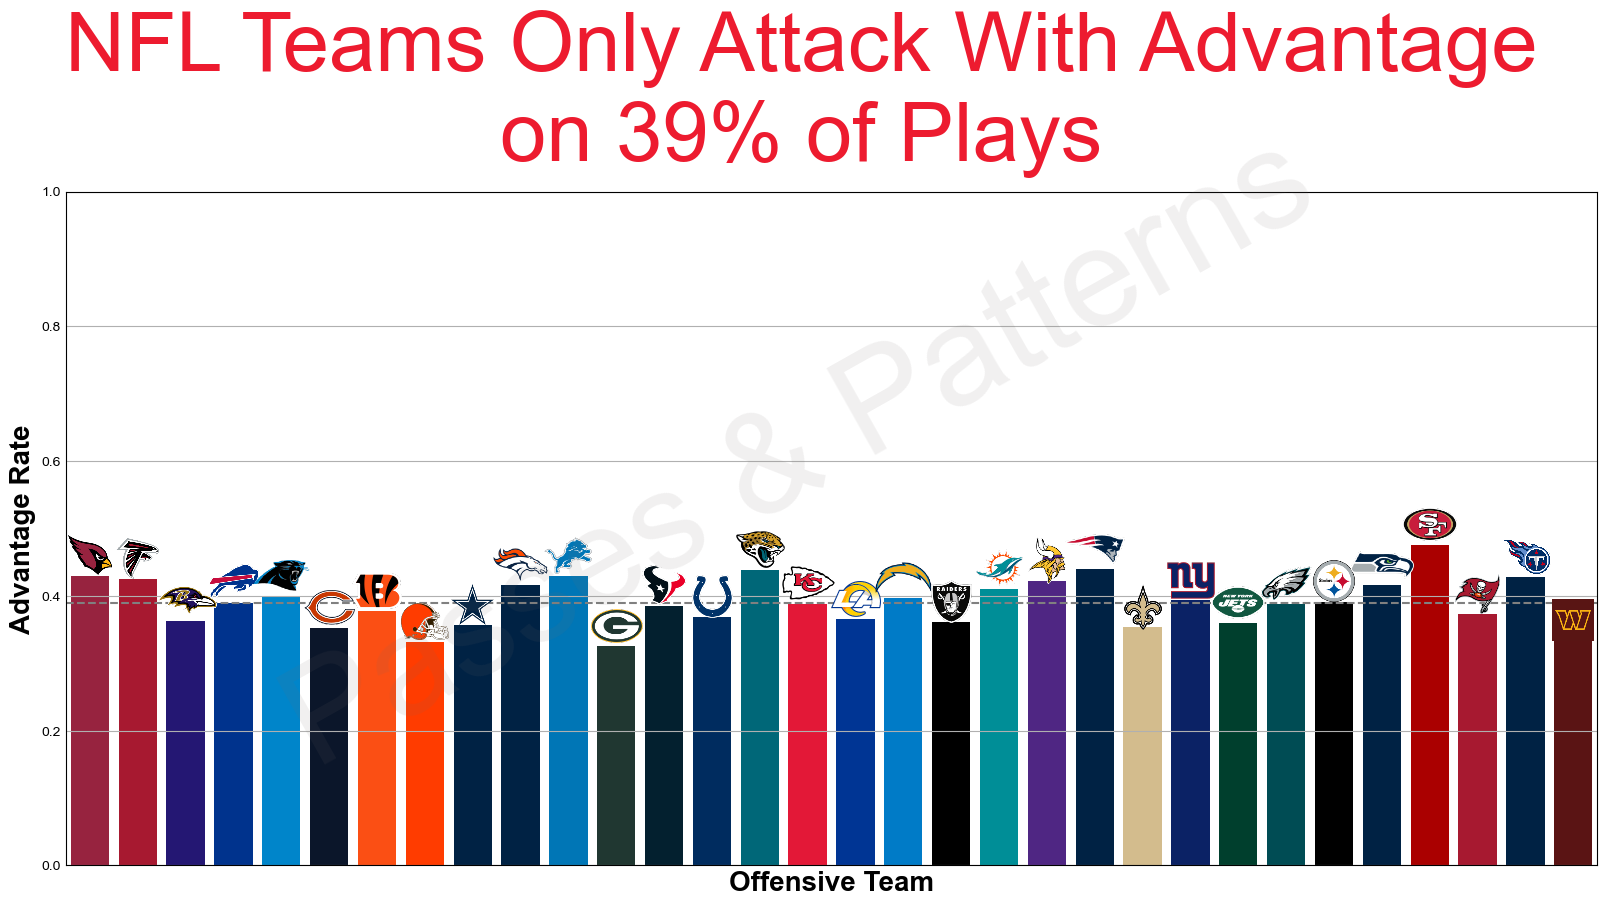

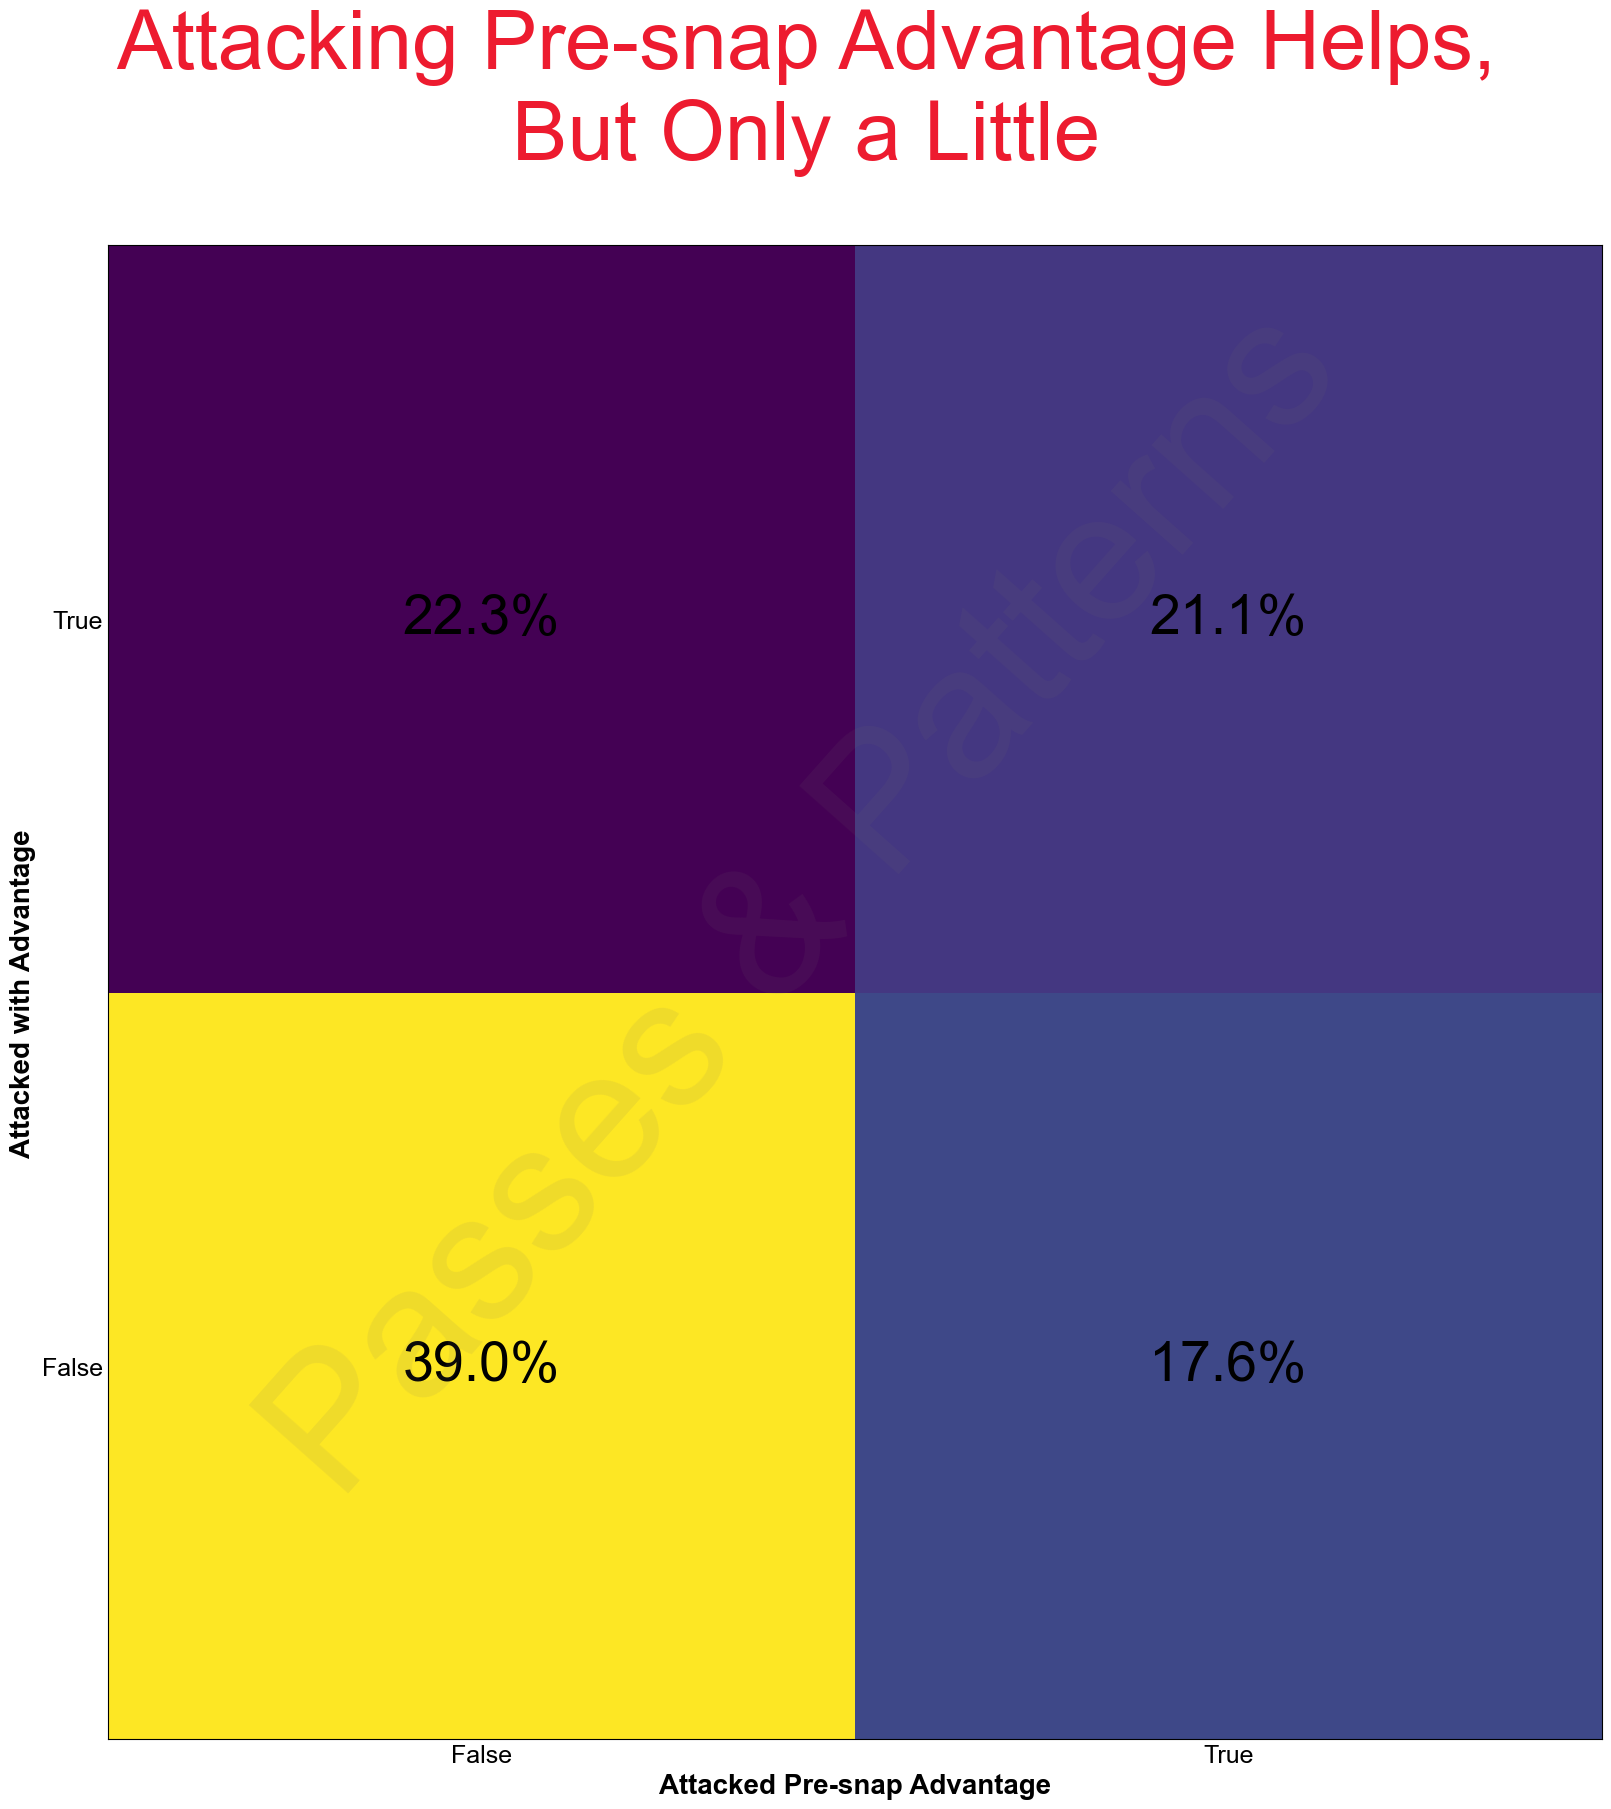

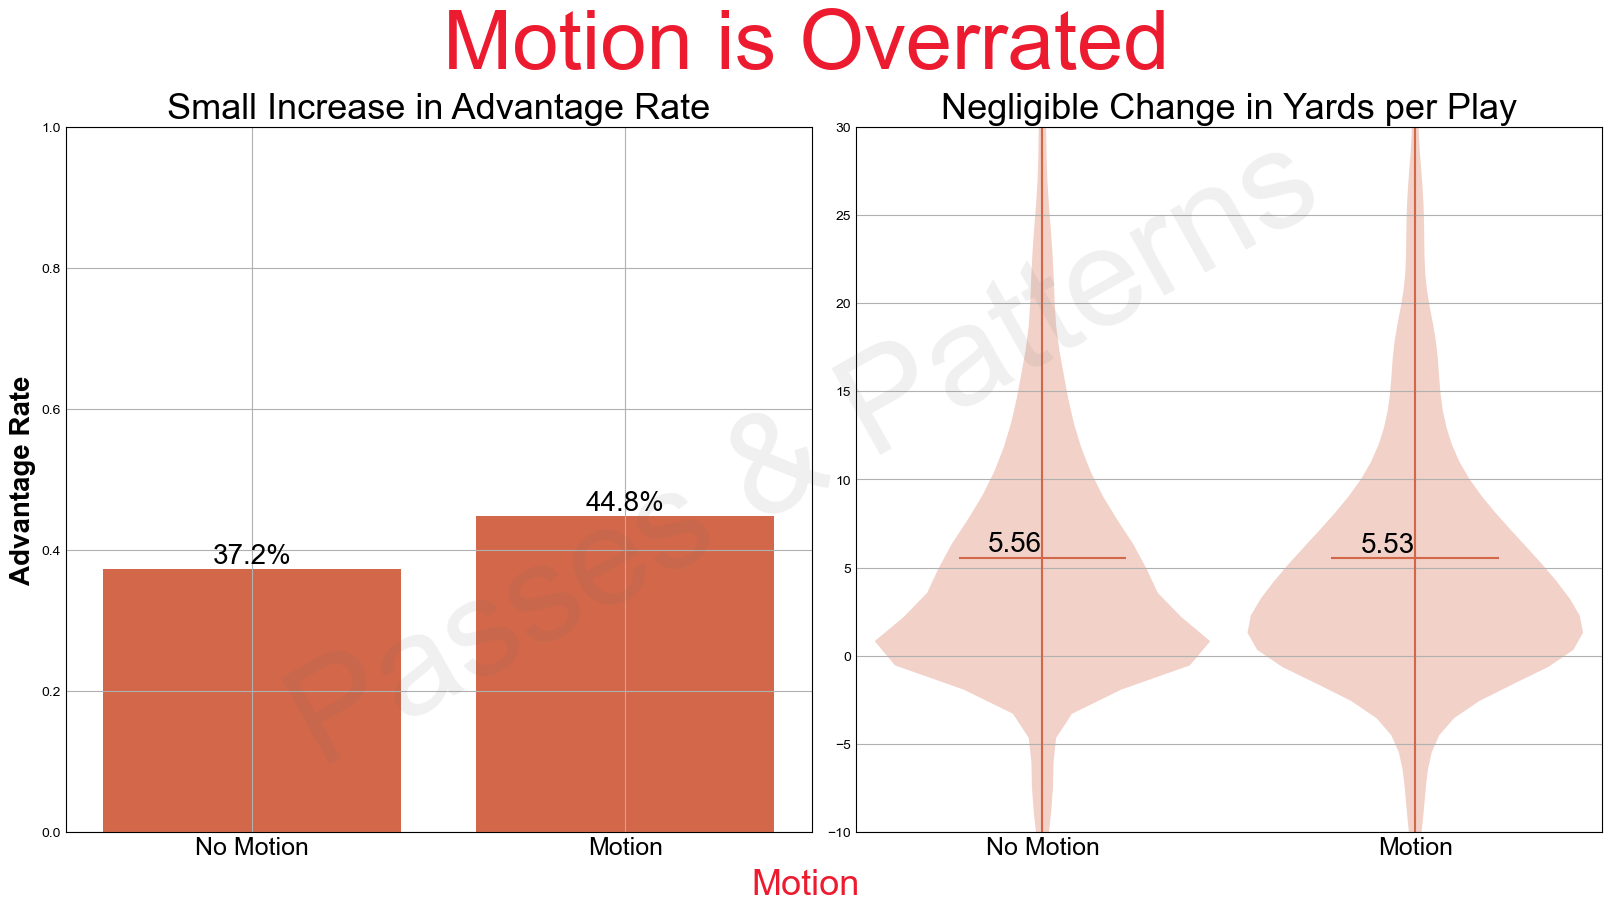

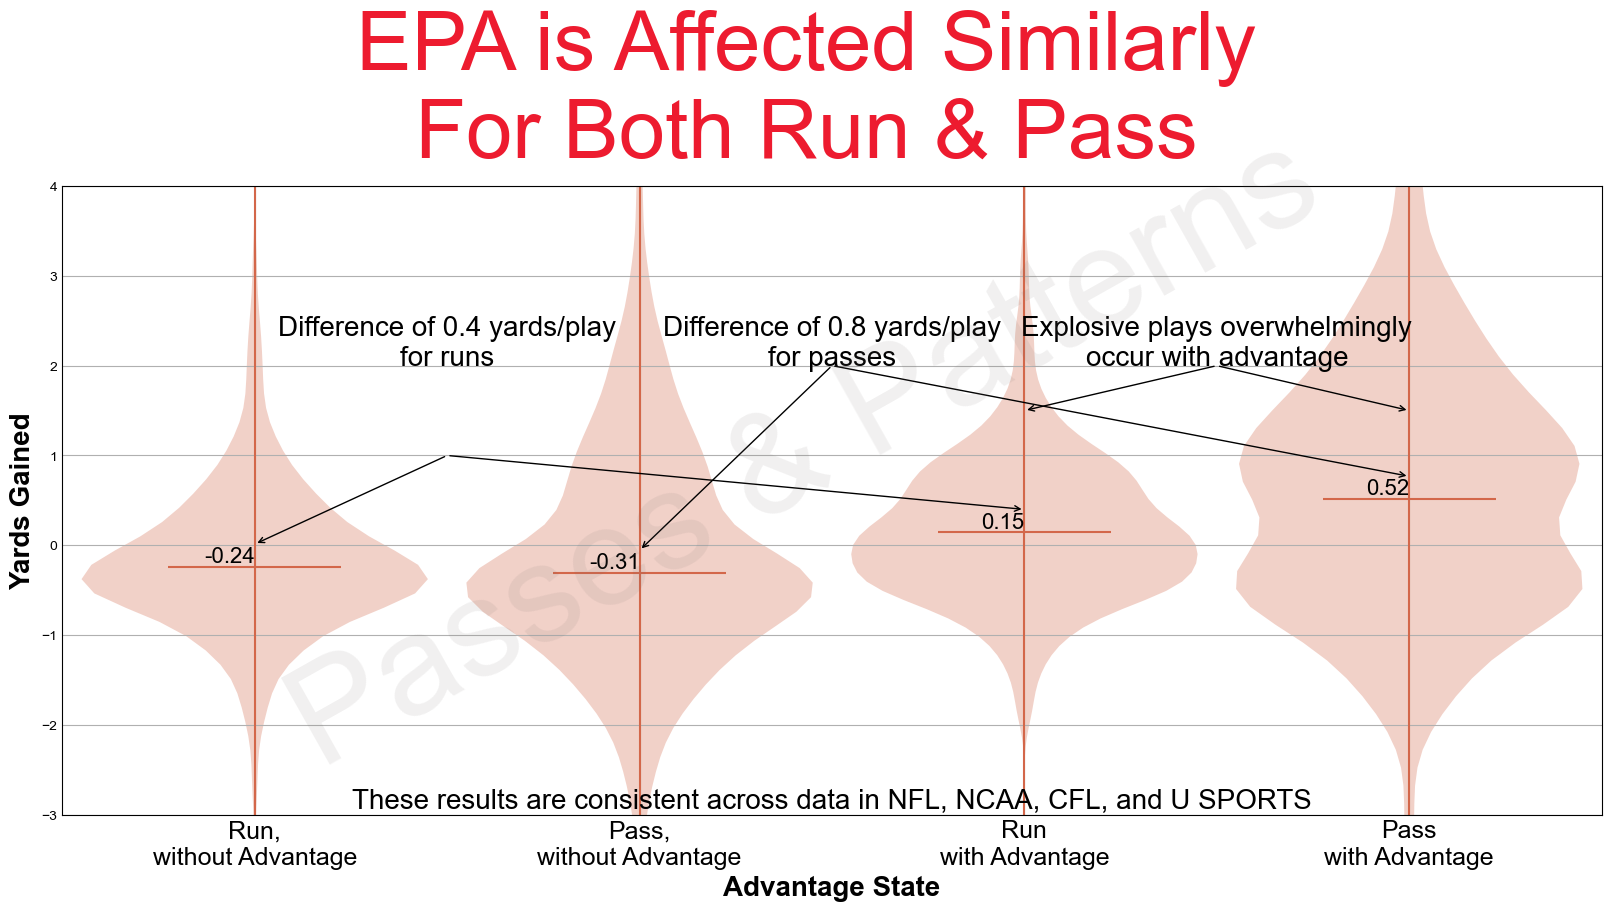

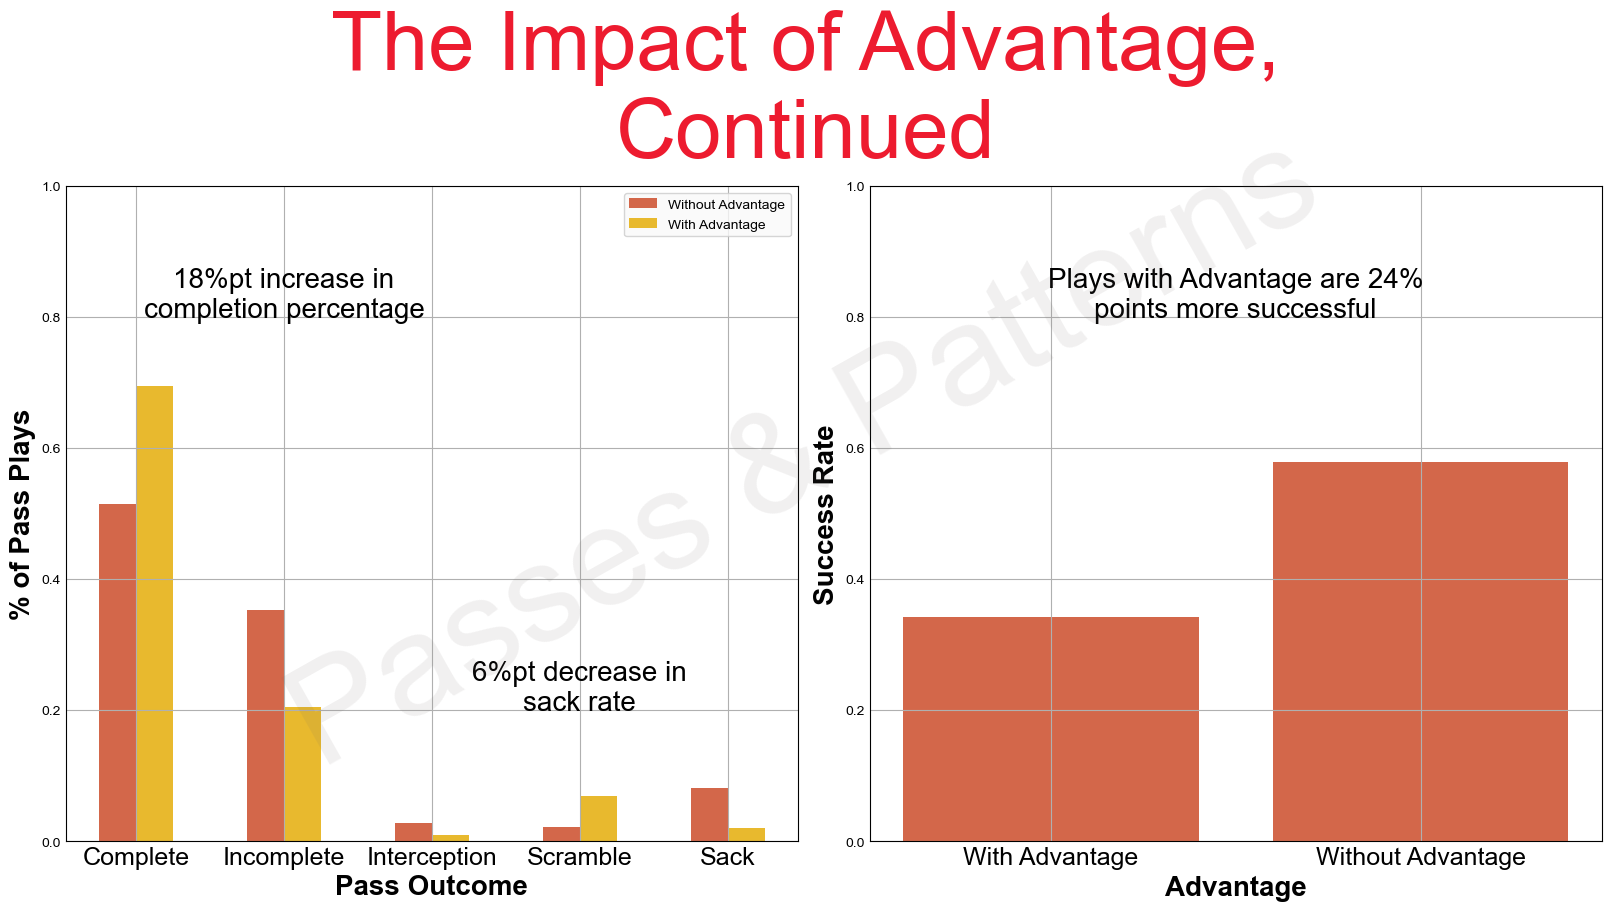

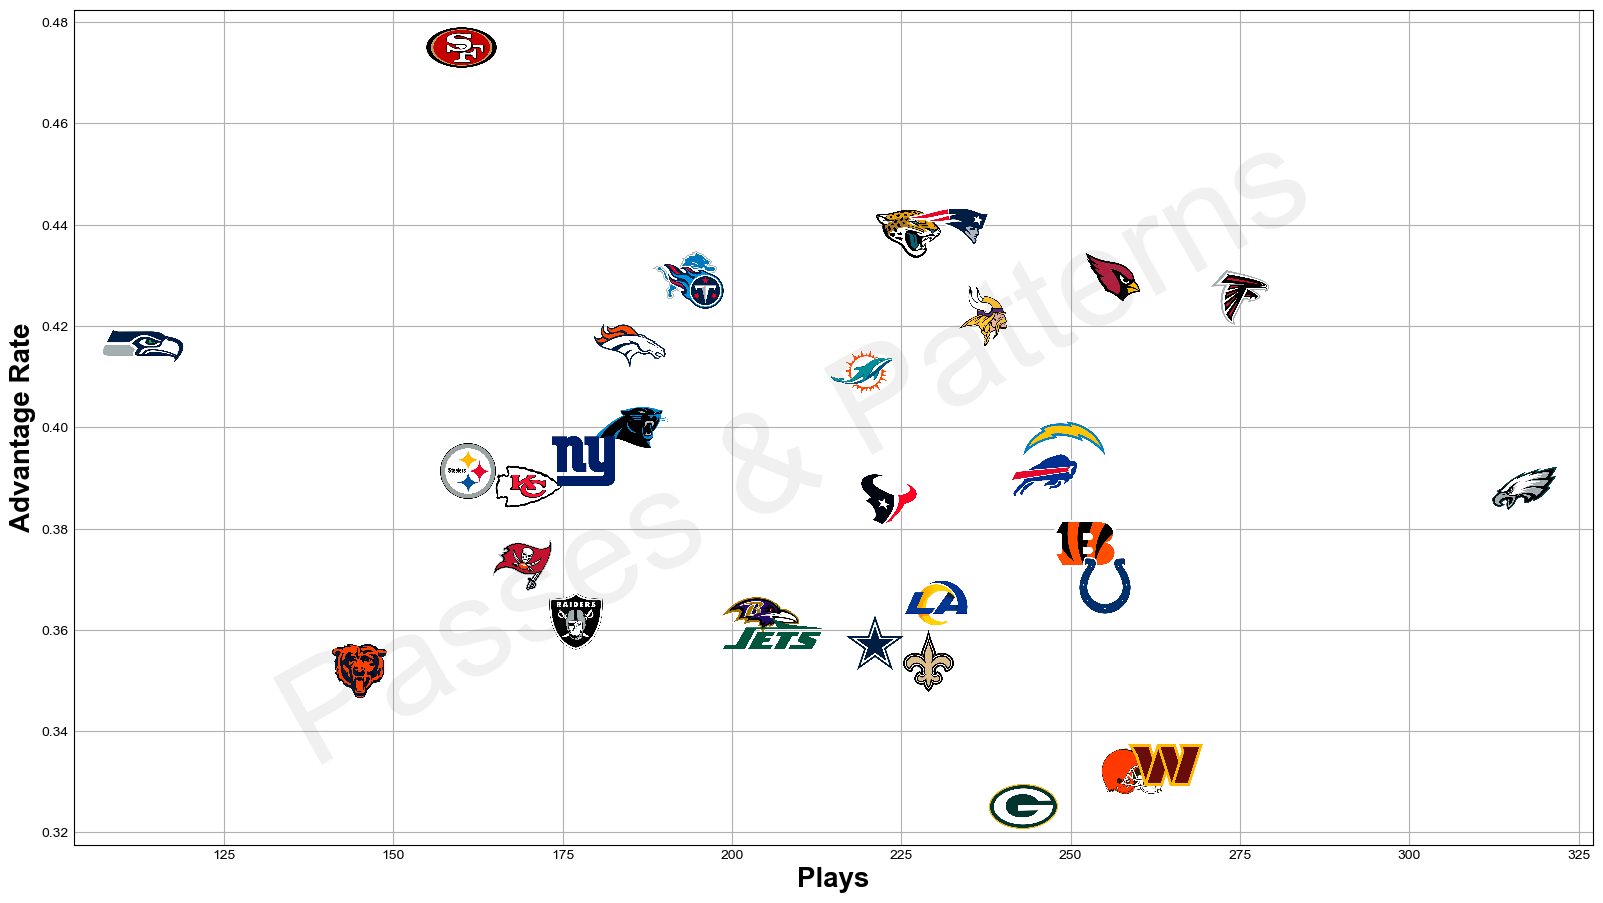

In [9]:
def advantage_violin():
    fig, ax = McGill_figure()
    data = [plays_df[plays_df["ADVANTAGE"] == truth]["pff_GAINLOSSNET"].tolist() for truth in [False, True]]
    ax.violinplot(data, [0, 1], showmeans=True, widths=0.9)
    ax.set(xlim=(-0.5, 1.5), ylim=(-15, 40),
           xlabel="Advantage State", ylabel="Yards Gained",
           xticks=[0, 1], xticklabels=["With Advantage", "Without Advantage"])
    for x in range(2):
        ax.text(x, numpy.mean(data[x]), numpy.mean(data[x]).round(2).__str__(), ha='right', va='bottom', size=16)
        ax.annotate("", xy=(x, numpy.mean(data[x]) + 2), xytext=(0.5, 20), arrowprops=dict(arrowstyle="->"))
    ax.text(0.5, 20, "Difference of " + numpy.subtract(numpy.mean(data[1]), numpy.mean(data[0])).round(1).__str__() + " yards/play", size=20, ha='center')    
    
    ax.text(0.5, -15, "Attacking with advantage shows comparable benefits for any metric you want - EPA, Comp%, Success Rate, Sack Rate...", va='bottom', ha='center', size=20)
    
    fig.suptitle("Advantage Doubles Yards per Play")
    fig.savefig()


def advantage_violin_by_RP():
    fig, ax = McGill_figure()
    data = [plays_df[(plays_df["ADVANTAGE"] == truth) & (plays_df["pff_RUNPASS"] == RP)]["pff_GAINLOSSNET"].tolist() for truth, RP in itertools.product([False, True], ["R", "P"])]
    ax.violinplot(data, range(4), showmeans=True, widths=0.9)
    ax.set(xlim=(-0.5, 3.5), ylim=(-15, 40),
           xlabel="Advantage State", ylabel="Yards Gained",
           xticks=range(4), xticklabels=["Run,\nwithout Advantage", "Pass,\nwithout Advantage", "Run\nwith Advantage", "Pass\nwith Advantage"])
    for x in range(4):
        ax.text(x, numpy.mean(data[x]), numpy.mean(data[x]).round(2).__str__(), ha='right', va='bottom', size=16)
    
    ax.text(0.5, 20, "Difference of " + numpy.subtract(numpy.mean(data[2]), numpy.mean(data[0])).round(1).__str__() + " yards/play\nfor runs", size=20, ha='center')
    ax.annotate("", xy=(0, numpy.mean(data[0]) + 2), xytext=(0.5, 20), arrowprops=dict(arrowstyle="->"))
    ax.annotate("", xy=(2, numpy.mean(data[2]) + 2), xytext=(0.5, 20), arrowprops=dict(arrowstyle="->"))

    ax.text(1.5, 20, "Difference of " + numpy.subtract(numpy.mean(data[3]), numpy.mean(data[1])).round(1).__str__() + " yards/play\nfor passes", size=20, ha='center')    
    ax.annotate("", xy=(1, numpy.mean(data[1]) + 2), xytext=(1.5, 20), arrowprops=dict(arrowstyle="->"))
    ax.annotate("", xy=(3, numpy.mean(data[3]) + 2), xytext=(1.5, 20), arrowprops=dict(arrowstyle="->"))   

    ax.text(2.5, 30, "Explosive plays overwhelmingly\noccur with advantage", ha='center', size=20)
    ax.annotate("", xy=(3, 20), xytext=(2.5, 30), arrowprops=dict(arrowstyle="->"))   
    ax.annotate("", xy=(2, 20), xytext=(2.5, 30), arrowprops=dict(arrowstyle="->"))   

    ax.text(1.5, -15, "These results are consistent across data in NFL, NCAA, CFL, and U SPORTS", ha='center', va='bottom', size=20)
    fig.suptitle("Advantage Doubles Yards per Play\nFor Both Run & Pass")
    fig.savefig()


def advantage_volin_by_RP_EPA():
    fig, ax = McGill_figure()
    data = [plays_df[(plays_df["ADVANTAGE"] == truth) & (plays_df["pff_RUNPASS"] == RP)]["expectedPointsAdded"].tolist() for truth, RP in itertools.product([False, True], ["R", "P"])]
    ax.violinplot(data, range(4), showmeans=True, widths=0.9)
    ax.set(xlim=(-0.5, 3.5), ylim=(-3, 4),
           xlabel="Advantage State", ylabel="Yards Gained",
           xticks=range(4), xticklabels=["Run,\nwithout Advantage", "Pass,\nwithout Advantage", "Run\nwith Advantage", "Pass\nwith Advantage"])
    for x in range(4):
        ax.text(x, numpy.mean(data[x]), numpy.mean(data[x]).round(2).__str__(), ha='right', va='bottom', size=16)
    
    ax.text(0.5, 2, "Difference of " + numpy.subtract(numpy.mean(data[2]), numpy.mean(data[0])).round(1).__str__() + " yards/play\nfor runs", size=20, ha='center')
    ax.annotate("", xy=(0, numpy.mean(data[0]) + 0.25), xytext=(0.5, 1), arrowprops=dict(arrowstyle="->"))
    ax.annotate("", xy=(2, numpy.mean(data[2]) + 0.25), xytext=(0.5, 1), arrowprops=dict(arrowstyle="->"))

    ax.text(1.5, 2, "Difference of " + numpy.subtract(numpy.mean(data[3]), numpy.mean(data[1])).round(1).__str__() + " yards/play\nfor passes", size=20, ha='center')    
    ax.annotate("", xy=(1, numpy.mean(data[1]) + 0.25), xytext=(1.5, 2), arrowprops=dict(arrowstyle="->"))
    ax.annotate("", xy=(3, numpy.mean(data[3]) + 0.25), xytext=(1.5, 2), arrowprops=dict(arrowstyle="->"))   

    ax.text(2.5, 2, "Explosive plays overwhelmingly\noccur with advantage", ha='center', size=20)
    ax.annotate("", xy=(3, 1.5), xytext=(2.5, 2), arrowprops=dict(arrowstyle="->"))   
    ax.annotate("", xy=(2, 1.5), xytext=(2.5, 2), arrowprops=dict(arrowstyle="->"))   

    ax.text(1.5, -3, "These results are consistent across data in NFL, NCAA, CFL, and U SPORTS", ha='center', va='bottom', size=20)
    fig.suptitle("EPA is Affected Similarly\nFor Both Run & Pass")
    fig.savefig()


def advantage_rate_by_team():
    fig, ax = McGill_figure()
    team_advantage = plays_df.groupby('possessionTeam')['ADVANTAGE'].mean()
    logos = teams_df[teams_df["team_abbr"].isin(plays_df['possessionTeam'])]
    ax.bar(range(32), team_advantage.values, color=logos['team_color'].values)
    ax.axhline(plays_df["ADVANTAGE"].mean(), linestyle='--', color='grey')
    ax.set(xlim=(-0.5, 31.5), ylim=(0, 1),
           xlabel="Offensive Team", ylabel="Advantage Rate",
           #    xticks=range(32), xticklabels=team_advantage.keys())
           xticks=[])
    ax.image_scatter(range(32), team_advantage.values+0.03, teams_df['team_logo_wikipedia'].values.tolist(), zoom=0.015)
    # ax.text(0, 0.6, "Overall average " + "{:.1%}".format(plays_df["ADVANTAGE"].mean()), ha='left', size=20)
    # ax.text(-0.5, 1, "Every coach says numbers are the core of their offence. It's not true.", ha='left', va='top', size=20)
    fig.suptitle("NFL Teams Only Attack With Advantage\non {:.0%}".format(plays_df["ADVANTAGE"].mean()) + " of Plays")
    fig.savefig()


def advantage_rate_by_def_team():
    fig, ax = McGill_figure()
    team_advantage = plays_df.groupby('defensiveTeam')['ADVANTAGE'].mean()
    logos = teams_df[teams_df["team_abbr"].isin(plays_df['possessionTeam'])]
    ax.bar(range(32), team_advantage.values, color=logos['team_color'].values)
    ax.axhline(plays_df["ADVANTAGE"].mean(), linestyle='--', color='grey')
    ax.set(xlim=(-0.5, 31.5), ylim=(0, 1),
           xlabel="Offensive Team", ylabel="Advantage Rate",
           #    xticks=range(32), xticklabels=team_advantage.keys())
           xticks=[])
    ax.image_scatter(range(32), team_advantage.values, teams_df['team_logo_wikipedia'].values.tolist(), zoom=0.015)
    ax.text(0, 0.6, "Overall average " + "{:.1%}".format(plays_df["ADVANTAGE"].mean()), ha='left', size=20)
    ax.text(-0.5, 1, "Every coach says numbers are the core of their offence. It's not true.", ha='left', va='top', size=20)
    fig.suptitle("No Team Defends Advantage Effectively")
    fig.savefig()


def advantage_rate_by_RP():
    fig, axs = McGill_figure(2, 1)
    for x, ax in enumerate(axs):
        team_advantage = plays_df[plays_df['pff_RUNPASS'] == ("P" if x else "R")].groupby('possessionTeam')['ADVANTAGE'].mean()
        logos = teams_df[teams_df["team_abbr"].isin(plays_df['possessionTeam'])]
        ax.bar(range(32), team_advantage.values, color=logos['team_color'].values)
        ax.axhline(plays_df[plays_df['pff_RUNPASS'] == ("P" if x else "R")]["ADVANTAGE"].mean(), linestyle='--', color='grey')
        ax.set(xlim=(-0.5, 31.5), ylim=(0, 1),
            xlabel="Offensive Team", ylabel="Advantage Rate",
            #    xticks=range(32), xticklabels=team_advantage.keys())
            xticks=[],
            title="Pass" if x else "Run")
        # ax.image_scatter(range(32), team_advantage.values, teams_df['team_logo_wikipedia'].values.tolist(), zoom=0.015)
        ax.text(0, 0.6, "Overall average " + "{:.1%}".format(plays_df[plays_df['pff_RUNPASS'] == ("P" if x else "R")]["ADVANTAGE"].mean()), ha='left', size=20)
        # ax.text(-0.5, 1, "Every coach says numbers are the core of their offence. It's not true.", ha='left', va='top', size=20)
    fig.suptitle("No Team Uses Advantage Effectively")
    fig.savefig()


def attack_presnap_advantage_confusion_matrix():
    # from matplotlib.colors import LinearSegmentedColormap
    # colour_dict = {'red': [(1, 1, 1), (237)]}
    # McGill_gradient = LinearSegmentedColormap.from_list('McGill',    
    fig, ax = McGill_figure(figsize=(16, 18))
    
    data = numpy.array([[plays_df[(plays_df['attack_presnap_advantage'] != "") & (plays_df['attack_presnap_advantage'] == x) & (plays_df['ADVANTAGE'] == y)].__len__() for x in [False, True]] for y in [False, True]])
    ax.imshow(data)
    ax.set(xlim=(-0.5, 1.5), ylim=(-0.5, 1.5),
           xticks=[0, 1], xticklabels=[False, True],
           yticks=[0, 1], yticklabels=[False, True],
           xlabel="Attacked Pre-snap Advantage", ylabel="Attacked with Advantage")
    ax.grid()
    for x, y in itertools.product([0, 1], [0, 1]):
        ax.text(x, y, "{:.1%}".format(data[x][y]/numpy.sum(data)), size=40, ha='center', va='center')
    fig.suptitle("Attacking Pre-snap Advantage Helps,\nBut Only a Little")
    fig.savefig()


def motion_plot():
    fig, axs = McGill_figure(1, 2)

    data = [plays_df[~plays_df['motion']]['ADVANTAGE'].mean(), plays_df[plays_df['motion']]['ADVANTAGE'].mean()]
    axs[0].bar([0, 1], data)
    axs[0].set(xlim=(-0.5, 1.5), ylim=(0, 1),
           xticks=[0, 1], xticklabels=["No Motion", "Motion"],
           ylabel="Advantage Rate",
           title="Small Increase in Advantage Rate")
    for x in range(2):
        axs[0].text(x, data[x], "{:.1%}".format(data[x]), ha='center', va='bottom', size=20)

    data = [plays_df[(plays_df['motion'] == truth)]['pff_GAINLOSSNET'].tolist() for truth in [False, True]]
    axs[1].violinplot(data, [0, 1],
                  widths=0.9, showmeans=True)
    axs[1].set(xlim=(-0.5, 1.5), ylim=(-10, 30),
           xticks=[0, 1], xticklabels=["No Motion", "Motion"],
           label="Yards Gained",
           title="Negligible Change in Yards per Play")
    for x in range(2):
        axs[1].text(x, numpy.mean(data[x]), numpy.mean(data[x]).round(2), va='bottom', ha='right', size=20)

    fig.suptitle("Motion is Overrated")
    fig.supxlabel("Motion")
    fig.savefig()

def completion_and_success():
    fig, axs = McGill_figure(1, 2)
    
    pass_results = plays_df.groupby(['ADVANTAGE', 'passResult']).size()
    pass_counts = plays_df[~pandas.isnull(plays_df['passResult'])].groupby('ADVANTAGE').size()
    pass_outcomes = pass_results/pass_counts
    print(pass_outcomes)
    axs[0].bar(numpy.arange(pass_outcomes[0].__len__()) - 0.125, pass_outcomes[0], label="Without Advantage", width=0.25)
    axs[0].bar(numpy.arange(pass_outcomes[1].__len__()) + 0.125, pass_outcomes[1], label="With Advantage", width=0.25)
    axs[0].set(xticks=range(5), xticklabels=["Complete", "Incomplete", "Interception", "Scramble", "Sack"],
               ylim=(0, 1),
               xlabel="Pass Outcome", ylabel="% of Pass Plays")
    axs[0].text(1, 0.8, "{:.0%}".format(numpy.subtract(pass_outcomes.loc[1, "C"], pass_outcomes.loc[0, "C"])) + "pt increase in\ncompletion percentage", size=20, ha='center')
    axs[0].text(3, 0.2, "{:.0%}".format(numpy.subtract(pass_outcomes.loc[0, "S"], pass_outcomes.loc[1, "S"])) + "pt decrease in\nsack rate", size=20, ha='center')
    axs[0].legend()

    SR = plays_df.groupby('ADVANTAGE')['expectedPointsAdded'].apply(lambda c: (c>0).sum()/len(c))
    axs[1].bar(numpy.arange(2), SR)
    axs[1].set(xlabel="Advantage", ylabel="Success Rate",
               ylim=(0, 1),
               xticks=[0, 1], xticklabels=['With Advantage', "Without Advantage"]
               )
    axs[1].text(0.5, 0.8, "Plays with Advantage are {:.0%}".format(numpy.subtract(*SR) * -1) + "\npoints more successful", ha='center', size=20)
    
    fig.suptitle("The Impact of Advantage,\nContinued")
    fig.savefig()



def advantage_violin_EPA():
    fig, ax = McGill_figure()
    data = [plays_df[plays_df["ADVANTAGE"] == truth]["expectedPointsAdded"].tolist() for truth in [False, True]]
    ax.violinplot(data, [0, 1], showmeans=True, widths=0.9)
    ax.set(xlim=(-0.5, 1.5), ylim=(-3, 4),
           xlabel="Advantage State", ylabel="Expected Points Added (EPA)",
           xticks=[0, 1], xticklabels=[False, True])
    for x in range(2):
        ax.text(x, numpy.mean(data[x]), numpy.mean(data[x]).round(2).__str__().zfill(2), ha='right', va='bottom', size=16)
        ax.annotate("", xy=(x, numpy.mean(data[x]) + 0.2), xytext=(0.5, 3), arrowprops=dict(arrowstyle="->"))
    ax.text(0.5, 3, "Difference of " + numpy.subtract(numpy.mean(data[1]), numpy.mean(data[0])).round(1).__str__() + " EPA/play", size=20, ha='center')    
        
    ax.axhline(plays_df['expectedPointsAdded'].mean(), color='grey', linestyle='--')
    ax.text(-0.5, 1, "Average EPA: " + plays_df['expectedPointsAdded'].mean().round(2).__str__().zfill(2), size=20)
    fig.suptitle("Advantage is Worth Half a Point per Play")
    fig.savefig()


def advantage_sample_size_logoplot():
    
    fig, ax = McGill_figure()
    team_advantage = plays_df.groupby('possessionTeam')['ADVANTAGE'].mean()
    team_counts = plays_df.groupby('possessionTeam').size()
    ax.image_scatter(team_counts, team_advantage, teams_df['team_logo_espn'], zoom=0.02)
    ax.set(xlabel="Plays", ylabel="Advantage Rate")
    plt.show()

advantage_violin()
advantage_violin_EPA()
advantage_violin_by_RP()
advantage_rate_by_team()
attack_presnap_advantage_confusion_matrix()
motion_plot()
advantage_volin_by_RP_EPA()
completion_and_success()

# advantage_rate_by_def_team()
# advantage_rate_by_RP()
advantage_sample_size_logoplot()
